In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPooling2D,Dropout,BatchNormalization,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib

In [2]:
data_dir = r"C:\Users\datma003\Desktop\projects\Rice Leaf Disease Detection\Dataset\rice_leaf_diseases"

In [3]:
data_dir

'C:\\Users\\datma003\\Desktop\\projects\\Rice Leaf Disease Detection\\Dataset\\rice_leaf_diseases'

In [4]:
data_dir=pathlib.Path(data_dir)

In [5]:
bacteria=list(data_dir.glob("Bacterial leaf blight/*"))
len(bacteria)

847

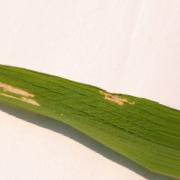

In [7]:
PIL.Image.open(str(bacteria[0]))

In [8]:
brown=list(data_dir.glob("Brown spot/*"))
len(brown)

845

In [9]:
image_dict={"bacteria":list(data_dir.glob("Bacterial leaf blight/*")),
      "brown":list(data_dir.glob("Brown spot/*")),
      "smut":list(data_dir.glob("Leaf smut/*")),
      "blast":list(data_dir.glob("blast/*")),
      "tungro":list(data_dir.glob("tungro/*"))
     }

In [10]:
labels_dict = {
    'bacteria': 0,
    'brown': 1,
    'smut': 2,
    'blast':3,
    'tungro':4
   }

In [11]:
str(image_dict["smut"][0])

'C:\\Users\\datma003\\Desktop\\projects\\Rice Leaf Disease Detection\\Dataset\\rice_leaf_diseases\\Leaf smut\\aug-smut_0_1014.jpeg'

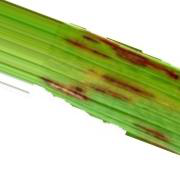

In [12]:
PIL.Image.open(str(image_dict["smut"][0]))

In [13]:
# from keras.preprocessing.image import img_to_array, load_img

# datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# augmented_images_dir = 'rice-leaf-disease-detection/rice_leaf_diseases/augmented_images'

# os.makedirs(augmented_images_dir, exist_ok=True)

# for name, images in image_dict.items():
    
#     image_class_dir = augmented_images_dir + '/' + name
#     os.makedirs(image_class_dir, exist_ok=True)
    
#     for image in images:
        
#         img = cv2.imread(str(image))
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         img = cv2.resize(img,(180,180))
        
#         x = img_to_array(img)
#         x = x.reshape((1,) + x.shape)

#         i = 0
#         for batch in datagen.flow(x, batch_size=1,
#                                   save_to_dir=image_class_dir, 
#                                   save_prefix=f'aug-{name}', 
#                                   save_format='jpeg'):
#             i += 1
#             if i > 20:
#                 break

In [14]:
len(image_dict['tungro'])

849

In [15]:
X, y = [], []
for name, images in image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(labels_dict[name])

In [16]:
len(y)

5018

In [17]:
y[:5]

[0, 0, 0, 0, 0]

In [18]:
y[900:906]

[1, 1, 1, 1, 1, 1]

In [19]:
y[2000:2006]

[2, 2, 2, 2, 2, 2]

In [20]:
X[0].shape

(180, 180, 3)

In [22]:
X = np.array(X)
y = np.array(y)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
len(X_test)

1255

In [25]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [26]:
model1 = Sequential([
    Input((180,180,3)),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(5,activation='softmax')
])

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [27]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 22, 22, 128)       0

In [28]:
model1.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30


118/118 [==============================] - 162s 1s/step - loss: 0.9740 - accuracy: 0.5679
Epoch 2/30
118/118 [==============================] - 168s 1s/step - loss: 0.5549 - accuracy: 0.7521
Epoch 3/30
118/118 [==============================] - 141s 1s/step - loss: 0.4408 - accuracy: 0.8041
Epoch 4/30
118/118 [==============================] - 162s 1s/step - loss: 0.3425 - accuracy: 0.8594
Epoch 5/30
118/118 [==============================] - 142s 1s/step - loss: 0.2973 - accuracy: 0.8807
Epoch 6/30
118/118 [==============================] - 178s 2s/step - loss: 0.1947 - accuracy: 0.9275
Epoch 7/30
118/118 [==============================] - 139s 1s/step - loss: 0.1053 - accuracy: 0.9625
Epoch 8/30
118/118 [==============================] - 114s 969ms/step - loss: 0.0996 - accuracy: 0.9668
Epoch 9/30
118/118 [==============================] - 111s 938ms/step - loss: 0.0699 - accuracy: 0.9761
Epoch 10/30
118/118 [==============================] - 112s 952ms/step - loss: 0.09

In [29]:
model1.evaluate(X_test_scaled,y_test)

40/40 [==============================] - 16s 374ms/step - loss: 0.1693 - accuracy: 0.9570


[0.1693459004163742, 0.9569721221923828]

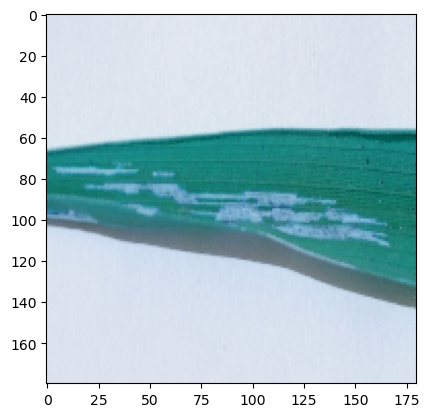

In [30]:
plt.imshow(X_test[540])

In [31]:
input_image = X_test[540] / 255.0
input_image = np.expand_dims(input_image, axis=0)

In [32]:
pre = model1.predict(input_image)
for disease,val in labels_dict.items():
    if np.argmax(pre) == val:
        print(disease)

1/1 [==============================] - 0s 437ms/step
bacteria


In [51]:
model1.save('riceleaf_newmodel.h5')

C:\Users\Dipyaman\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
test_img = cv2.imread(r"C:\Users\datma003\Desktop\projects\Rice Leaf Disease Detection\Dataset\rice_leaf_diseases\Leaf smut\aug-smut_0_53.jpeg")
test_img = cv2.resize(test_img,(180,180))
test_img = np.array(test_img)
test_img = test_img / 255
test_img = np.expand_dims(test_img, axis=0)
pre = model1.predict(test_img)
for disease,val in labels_dict.items():
    if np.argmax(pre) == val:
        print(disease)

1/1 [==============================] - 0s 98ms/step
smut
